In [1]:
import pandas as pd

db_folder = '/home/georgy/Documents/deepfakes/'

data_file = db_folder + 'LA/ASVspoof2019_LA_cm_protocols/ASVspoof2019.LA.cm.eval.trl.txt'
data_pred_file = 'eval_scores/scores-mfcc-asvspoof21-LA.txt'

In [2]:
data = pd.read_csv(data_file, sep=' ', header=None)

data = data[[0, 1, 3, 4]]
data['label'] = data[4].apply(lambda x: 1 if x=='bonafide' else 0)
data = data.rename(columns={0: 'speaker', 1: 'record', 3: 'algo', 4: 'bona or spoof'})
data

,speaker,record,algo,bona or spoof,label
0,LA_0039,LA_E_2834763,A11,spoof,0
1,LA_0014,LA_E_8877452,A14,spoof,0
2,LA_0040,LA_E_6828287,A16,spoof,0
3,LA_0022,LA_E_6977360,A09,spoof,0
4,LA_0031,LA_E_5932896,A13,spoof,0
...,...,...,...,...,...
71232,LA_0004,LA_E_1665632,-,bonafide,1
71233,LA_0038,LA_E_5085671,A09,spoof,0
71234,LA_0012,LA_E_4926022,A16,spoof,0
71235,LA_0052,LA_E_2894498,-,bonafide,1


In [3]:
data_pred = pd.read_csv(data_pred_file, sep=' ', header=None)
# Выбираем эвристическим путем
thresshold = 1.0
data_pred['label_pred'] = data_pred[1].apply(lambda x: 1 if x >= thresshold else 0)
data_pred = data_pred.rename(columns={0: 'record', 1: 'score'})
data_pred

,record,score,label_pred
0,LA_E_2834763,-1.265385,0
1,LA_E_8877452,-1.035412,0
2,LA_E_6828287,-1.296425,0
3,LA_E_6977360,-6.276355,0
4,LA_E_5932896,0.601464,0
...,...,...,...
71232,LA_E_1665632,2.100094,1
71233,LA_E_5085671,-4.071611,0
71234,LA_E_4926022,-0.056056,0
71235,LA_E_2894498,1.702875,1


In [4]:
data = data.merge(right=data_pred, on='record')

In [5]:
data

,speaker,record,algo,bona or spoof,label,score,label_pred
0,LA_0039,LA_E_2834763,A11,spoof,0,-1.265385,0
1,LA_0014,LA_E_8877452,A14,spoof,0,-1.035412,0
2,LA_0040,LA_E_6828287,A16,spoof,0,-1.296425,0
3,LA_0022,LA_E_6977360,A09,spoof,0,-6.276355,0
4,LA_0031,LA_E_5932896,A13,spoof,0,0.601464,0
...,...,...,...,...,...,...,...
71232,LA_0004,LA_E_1665632,-,bonafide,1,2.100094,1
71233,LA_0038,LA_E_5085671,A09,spoof,0,-4.071611,0
71234,LA_0012,LA_E_4926022,A16,spoof,0,-0.056056,0
71235,LA_0052,LA_E_2894498,-,bonafide,1,1.702875,1


In [6]:
accuracy = (data.shape[0] - data[data['label'] != data['label_pred']].shape[0]) / data.shape[0]
accuracy

0.841557056024257

In [7]:
FP = data[(data['label'] == 0) & (data['label_pred'] == 1)]
FP

,speaker,record,algo,bona or spoof,label,score,label_pred
24,LA_0031,LA_E_2355000,A13,spoof,0,1.048562,1
34,LA_0024,LA_E_8868279,A10,spoof,0,1.018894,1
37,LA_0029,LA_E_9120891,A10,spoof,0,1.172997,1
38,LA_0024,LA_E_2634822,A17,spoof,0,1.249379,1
41,LA_0024,LA_E_4920751,A17,spoof,0,1.189135,1
...,...,...,...,...,...,...,...
71217,LA_0022,LA_E_1440587,A18,spoof,0,1.102129,1
71223,LA_0012,LA_E_5722427,A17,spoof,0,1.280421,1
71229,LA_0028,LA_E_2104346,A10,spoof,0,1.569296,1
71230,LA_0009,LA_E_3635712,A10,spoof,0,1.169560,1


In [8]:
FN = data[(data['label'] == 1) & (data['label_pred'] == 0)]
FN

,speaker,record,algo,bona or spoof,label,score,label_pred
140,LA_0064,LA_E_8739004,-,bonafide,1,0.585976,0
315,LA_0010,LA_E_2607678,-,bonafide,1,0.655424,0
352,LA_0051,LA_E_3924689,-,bonafide,1,0.805127,0
425,LA_0047,LA_E_6964855,-,bonafide,1,0.986882,0
674,LA_0042,LA_E_1443485,-,bonafide,1,0.530964,0
...,...,...,...,...,...,...,...
70470,LA_0042,LA_E_7789337,-,bonafide,1,0.859436,0
70494,LA_0033,LA_E_2389098,-,bonafide,1,0.955660,0
70543,LA_0010,LA_E_2261371,-,bonafide,1,0.899872,0
70742,LA_0042,LA_E_2667568,-,bonafide,1,0.584227,0


In [9]:
TP = data[(data['label'] == 1) & (data['label_pred'] == 1)]
TP

,speaker,record,algo,bona or spoof,label,score,label_pred
5,LA_0030,LA_E_5849185,-,bonafide,1,1.781806,1
7,LA_0033,LA_E_4581379,-,bonafide,1,1.249128,1
15,LA_0039,LA_E_6314733,-,bonafide,1,1.980524,1
17,LA_0037,LA_E_3379393,-,bonafide,1,1.846956,1
39,LA_0028,LA_E_3757378,-,bonafide,1,3.280753,1
...,...,...,...,...,...,...,...
71202,LA_0061,LA_E_9017208,-,bonafide,1,2.431942,1
71205,LA_0061,LA_E_7055986,-,bonafide,1,2.101271,1
71209,LA_0057,LA_E_6708601,-,bonafide,1,2.055362,1
71232,LA_0004,LA_E_1665632,-,bonafide,1,2.100094,1


In [10]:
TN = data[(data['label'] == 0) & (data['label_pred'] == 0)]
TN

,speaker,record,algo,bona or spoof,label,score,label_pred
0,LA_0039,LA_E_2834763,A11,spoof,0,-1.265385,0
1,LA_0014,LA_E_8877452,A14,spoof,0,-1.035412,0
2,LA_0040,LA_E_6828287,A16,spoof,0,-1.296425,0
3,LA_0022,LA_E_6977360,A09,spoof,0,-6.276355,0
4,LA_0031,LA_E_5932896,A13,spoof,0,0.601464,0
...,...,...,...,...,...,...,...
71227,LA_0001,LA_E_1774414,A19,spoof,0,0.799556,0
71228,LA_0019,LA_E_6774439,A08,spoof,0,-1.489405,0
71231,LA_0010,LA_E_4078898,A10,spoof,0,0.763811,0
71233,LA_0038,LA_E_5085671,A09,spoof,0,-4.071611,0


In [11]:
# Насколько можем доверять модели, когда предсказывает метку 1 (речь натуральная)
precision = TP.shape[0] / (TP.shape[0] + FP.shape[0])
precision

0.3884602292068535

In [12]:
# Насколько модель покрывает положительный класс
recall = TP.shape[0] / (TP.shape[0] + FN.shape[0])
recall

0.930931339225017

In [13]:
# среднее гармоническое
average_harmonic = 2 * precision * recall / (precision + recall)
average_harmonic

0.5481766142268124

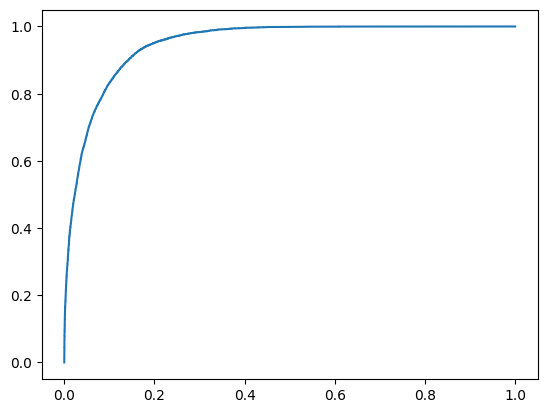

AUC_ROC: 0.9485790071263062


In [17]:
# ROC curve and auc_roc
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

y = data['label'].to_numpy()
scores = data['score'].to_numpy()

fpr, tpr, thresholds = metrics.roc_curve(y, scores, pos_label=1)

plt.plot(fpr,tpr)
plt.savefig('mfcc.png')
plt.show() 

# Print AUC
auc = np.trapz(tpr,fpr)
print('AUC_ROC:', auc)

In [15]:
#threshold
fnr = 1 - tpr
eer_threshold = thresholds[np.nanargmin(np.absolute((fnr - fpr)))]
eer_threshold

1.147395578815818

In [16]:
#eer
EER = fpr[np.nanargmin(np.absolute((fnr - fpr)))]
EER

0.12438558592404746